In [ ]:
#import pandas
import pandas as pd
import numpy as np
# load dataset
data = pd.read_csv('/content/Raw_Females_VF_Dataset.csv')
data.head(10)


,SUBJECT_ID,SEX,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres
0,A0011,F,53,30,170.8,79.66,92,105,143.0,78,3,0.0,XNBH,NaN,-0.59
1,A0012,F,64,23,169.0,58.28,67,77,95.0,117,3,0.0,NaN,NaN,-0.59
2,A0013,F,46,21,173.0,57.16,73,81,103.0,41,3,0.0,NaN,NaN,0.37
3,A0014,F,45,26,158.0,56.84,73,74,100.0,116,3,1.0,NaN,45.0,0.27
4,A0015,F,61,40,168.0,104.08,96,89,115.0,63,8,0.0,NaN,NaN,0.27
5,A0016,F,66,36,173.0,100.40,92,69,89.0,163,3,0.0,NaN,NaN,0.27
6,A0017,F,63,31,163.0,75.34,95,82,120.0,60,3,0.0,NaN,NaN,0.27
7,A0018,F,45,21,166.0,54.26,77,78,109.0,80,0,0.0,NaN,NaN,0.27
8,A0019,F,49,25,167.0,61.30,75,80,124.0,203,2,1.0,NaN,12.0,0.10
9,A0020,F,45,25,161.6,58.91,69,101,132.0,99,4,0.0,NaN,NaN,0.08


In [2]:
data['Intervention_Urgency']=np.where(data['Visceral_Fat_Volume_Litres']<=2.00
                                      ,"None",np.where(data['Visceral_Fat_Volume_Litres']<=5.00,'Medium','High'))

In [3]:
# selecting the input and the class variable by droping other variables
cw = data.drop(['SUBJECT_ID','SEX','DISCONTINUED_NO_'],axis = 1)
cw.dtypes

AGE_years                            int64
BMI                                  int64
HEIGHT_cm                          float64
WEIGHT_kg                          float64
WAIST_CIRCUMFERENCE_cm               int64
DIASTOLIC_BLOOD_PRESSURE_mmHg        int64
SYSTOLIC_BLOOD_PRESSURE_mmHg       float64
WALK_DURATION_PER_DAY_MINUTES        int64
COMPUTER_USE_TIME_PER_DAY_HOURS      int64
SMOKING_STATUS                     float64
CIGARETTES_CONSUMED_PER_DAY        float64
Visceral_Fat_Volume_Litres         float64
Intervention_Urgency                object
dtype: object

In [4]:
#cw[cw['AGE_years','BMI','HEIGHT_cm','WEIGHT_kg','CIGARETTES_CONSUMED_PER_DAY','COMPUTER_USE_TIME_PER_DAY_HOURS'
#,'DIASTOLIC_BLOOD_PRESSURE_mmHg','SYSTOLIC_BLOOD_PRESSURE_mmHg','WAIST_CIRCUMFERENCE_cm','WALK_DURATION_PER_DAY_MINUTES','Intervention_Urgency']]

poss_inp = cw.drop(['SMOKING_STATUS ','Visceral_Fat_Volume_Litres'],axis=1)
poss_inp.head(10)

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,CIGARETTES_CONSUMED_PER_DAY,Intervention_Urgency
0,53,30,170.8,79.66,92,105,143.0,78,3,NaN,None
1,64,23,169.0,58.28,67,77,95.0,117,3,NaN,None
2,46,21,173.0,57.16,73,81,103.0,41,3,NaN,None
3,45,26,158.0,56.84,73,74,100.0,116,3,45.0,None
4,61,40,168.0,104.08,96,89,115.0,63,8,NaN,None
5,66,36,173.0,100.40,92,69,89.0,163,3,NaN,None
6,63,31,163.0,75.34,95,82,120.0,60,3,NaN,None
7,45,21,166.0,54.26,77,78,109.0,80,0,NaN,None
8,49,25,167.0,61.30,75,80,124.0,203,2,12.0,None
9,45,25,161.6,58.91,69,101,132.0,99,4,NaN,None


In [5]:
cw['Intervention_Urgency'].value_counts()

Medium    1896
High       706
None       554
Name: Intervention_Urgency, dtype: int64

(array([ 554.,    0.,    0.,    0.,    0., 1896.,    0.,    0.,    0.,
         706.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

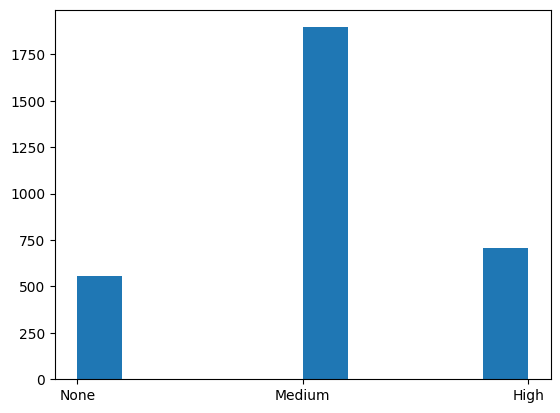

In [6]:
import matplotlib.pyplot as plt
plt.hist(cw['Intervention_Urgency'])

In [7]:
cw.dtypes

AGE_years                            int64
BMI                                  int64
HEIGHT_cm                          float64
WEIGHT_kg                          float64
WAIST_CIRCUMFERENCE_cm               int64
DIASTOLIC_BLOOD_PRESSURE_mmHg        int64
SYSTOLIC_BLOOD_PRESSURE_mmHg       float64
WALK_DURATION_PER_DAY_MINUTES        int64
COMPUTER_USE_TIME_PER_DAY_HOURS      int64
SMOKING_STATUS                     float64
CIGARETTES_CONSUMED_PER_DAY        float64
Visceral_Fat_Volume_Litres         float64
Intervention_Urgency                object
dtype: object

In [8]:
cw.describe()

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres
count,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3145.000000,3156.000000,3156.000000,3154.000000,163.000000,3156.000000
mean,60.891001,28.510456,169.652725,76.256980,87.613118,88.385615,126.741176,79.685044,3.423638,0.047242,26.196319,3.698989
std,8.379783,4.582564,8.231651,13.042267,11.564449,10.735779,18.891475,60.269960,3.722830,0.212189,14.157343,1.840066
min,41.000000,18.000000,1.500000,48.290000,58.000000,54.000000,81.000000,1.000000,0.000000,0.000000,2.000000,-0.590000
25%,55.000000,25.000000,165.000000,67.320000,79.000000,81.000000,113.000000,44.000000,0.000000,0.000000,14.000000,2.357500
50%,61.000000,28.000000,170.000000,74.090000,86.000000,88.000000,125.000000,67.000000,3.000000,0.000000,24.000000,3.510000
75%,67.000000,31.000000,174.000000,83.000000,94.000000,95.000000,139.000000,94.000000,5.000000,0.000000,38.000000,4.860000
max,180.000000,63.000000,206.000000,163.350000,145.000000,132.000000,191.000000,715.000000,40.000000,1.000000,50.000000,13.540000


In [9]:
cw.isna().sum()

AGE_years                             0
BMI                                   0
HEIGHT_cm                             0
WEIGHT_kg                             0
WAIST_CIRCUMFERENCE_cm                0
DIASTOLIC_BLOOD_PRESSURE_mmHg         0
SYSTOLIC_BLOOD_PRESSURE_mmHg         11
WALK_DURATION_PER_DAY_MINUTES         0
COMPUTER_USE_TIME_PER_DAY_HOURS       0
SMOKING_STATUS                        2
CIGARETTES_CONSUMED_PER_DAY        2993
Visceral_Fat_Volume_Litres            0
Intervention_Urgency                  0
dtype: int64

In [10]:
cw[(cw['CIGARETTES_CONSUMED_PER_DAY'] > 0) & ((cw['SMOKING_STATUS '] == 0) | (cw['SMOKING_STATUS '].isna()))]

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Intervention_Urgency
295,49,23,179.0,65.69,73,89,117.0,156,0,0.0,11.0,1.44,None
414,48,27,179.0,80.24,83,83,106.0,308,0,0.0,22.0,1.72,None
434,77,23,173.0,61.61,79,103,145.0,168,0,NaN,8.0,1.77,None
857,55,28,166.0,75.43,91,81,95.0,48,6,0.0,13.0,2.48,Medium
1002,64,28,177.0,80.00,88,91,116.0,34,0,0.0,6.0,2.70,Medium
1131,65,24,176.0,66.84,89,78,106.0,54,3,NaN,18.0,2.87,Medium
1224,62,27,168.0,74.00,80,94,134.0,78,0,0.0,10.0,3.00,Medium
1599,63,22,166.0,54.78,76,83,99.0,39,0,0.0,13.0,3.54,Medium
1618,51,33,165.0,82.68,94,96,130.0,217,3,0.0,9.0,3.57,Medium
1686,63,26,157.0,59.69,88,98,180.0,298,3,0.0,8.0,3.67,Medium


In [11]:
cw[(cw['SMOKING_STATUS '] == 1) & ((cw['CIGARETTES_CONSUMED_PER_DAY'] == 0) | (cw['CIGARETTES_CONSUMED_PER_DAY'].isnull()))]

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Intervention_Urgency


In [12]:
cw[(cw['SMOKING_STATUS '] == 0) & (cw['CIGARETTES_CONSUMED_PER_DAY'] == 0)]

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Intervention_Urgency


In [13]:
cw[cw['CIGARETTES_CONSUMED_PER_DAY'] > 0 & ((cw['SMOKING_STATUS '] == 0) | (cw['SMOKING_STATUS '].isna()))]

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Intervention_Urgency
3,45,26,158.0,56.84,73,74,100.0,116,3,1.0,45.0,0.27,None
8,49,25,167.0,61.30,75,80,124.0,203,2,1.0,12.0,0.10,None
41,59,26,1.5,60.64,70,83,166.0,43,3,1.0,47.0,0.39,None
54,66,26,169.0,71.46,76,89,129.0,329,2,1.0,38.0,0.46,None
64,67,24,168.0,63.83,76,97,149.0,86,6,1.0,13.0,0.50,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,57,31,165.0,81.73,99,92,127.0,31,5,1.0,29.0,6.88,High
3047,55,34,176.0,98.16,103,87,133.0,62,0,1.0,26.0,7.45,High
3065,60,34,177.0,103.77,110,100,147.0,62,12,1.0,50.0,7.63,High
3077,57,35,173.5,98.03,111,76,114.0,57,5,1.0,23.0,7.84,High


In [14]:

# converting the smoking status as 1 when the cigarettes consumed has some value
cw.loc[(cw['CIGARETTES_CONSUMED_PER_DAY'] > 0) & ((cw['SMOKING_STATUS '] == 0) | (cw['SMOKING_STATUS '].isna())), 'SMOKING_STATUS '] = 1


cw[(cw['CIGARETTES_CONSUMED_PER_DAY'] > 0) & ((cw['SMOKING_STATUS '] == 0) | (cw['SMOKING_STATUS '].isna()))]

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Intervention_Urgency


In [15]:
cw.isna().sum()

AGE_years                             0
BMI                                   0
HEIGHT_cm                             0
WEIGHT_kg                             0
WAIST_CIRCUMFERENCE_cm                0
DIASTOLIC_BLOOD_PRESSURE_mmHg         0
SYSTOLIC_BLOOD_PRESSURE_mmHg         11
WALK_DURATION_PER_DAY_MINUTES         0
COMPUTER_USE_TIME_PER_DAY_HOURS       0
SMOKING_STATUS                        0
CIGARETTES_CONSUMED_PER_DAY        2993
Visceral_Fat_Volume_Litres            0
Intervention_Urgency                  0
dtype: int64

In [16]:
cw.shape

(3156, 13)

(array([   0,    1,    2, ..., 3153, 3154, 3155]),)


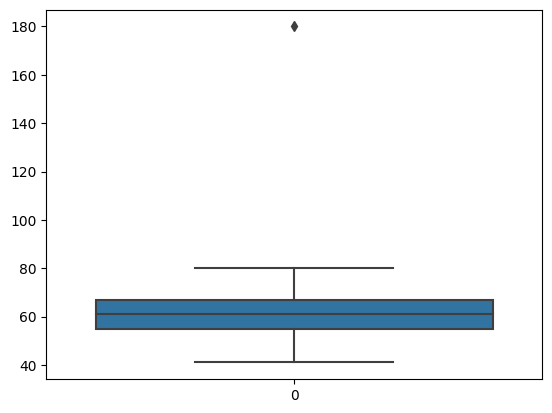

In [17]:
import seaborn as sns
import numpy as np
sns.boxplot(cw['AGE_years'])

print(np.where(cw['AGE_years']>10))

In [18]:
# droped age outlier
cw.drop(cw[cw['AGE_years'] == 180].index, inplace=True)

In [19]:
cw.shape

(3155, 13)

(array([   0,    1,    2, ..., 3152, 3153, 3154]),)


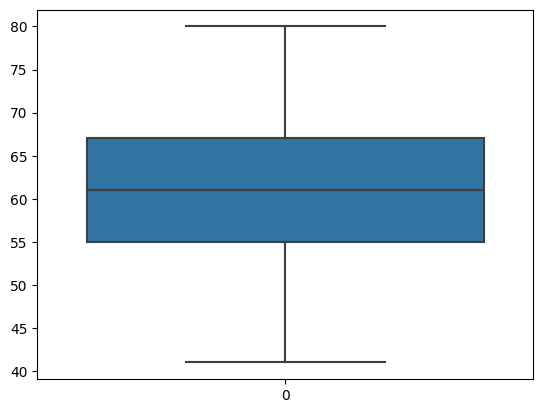

In [20]:
sns.boxplot(cw['AGE_years'])

print(np.where(cw['AGE_years']>10))

In [21]:
cw.describe()

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres
count,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3144.000000,3155.000000,3155.000000,3155.000000,163.000000,3155.000000
mean,60.853249,28.506181,169.653883,76.246247,87.598098,88.384152,126.732506,79.698257,3.424723,0.051664,26.196319,3.695870
std,8.108238,4.576990,8.232698,13.030386,11.535454,10.737167,18.888221,60.274943,3.722920,0.221383,14.157343,1.831993
min,41.000000,18.000000,1.500000,48.290000,58.000000,54.000000,81.000000,1.000000,0.000000,0.000000,2.000000,-0.590000
25%,55.000000,25.000000,165.000000,67.320000,79.000000,81.000000,113.000000,44.000000,0.000000,0.000000,14.000000,2.355000
50%,61.000000,28.000000,170.000000,74.090000,86.000000,88.000000,125.000000,67.000000,3.000000,0.000000,24.000000,3.510000
75%,67.000000,31.000000,174.000000,83.000000,94.000000,95.000000,139.000000,94.000000,5.000000,0.000000,38.000000,4.860000
max,80.000000,63.000000,206.000000,163.350000,145.000000,132.000000,191.000000,715.000000,40.000000,1.000000,50.000000,12.770000


(array([   0,    1,    2, ..., 3152, 3153, 3154]),)


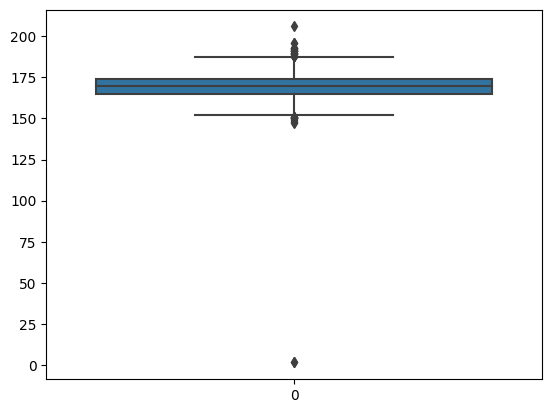

In [22]:
sns.boxplot(cw['HEIGHT_cm'])

print(np.where(cw['HEIGHT_cm']>10))

In [23]:
cw[cw['HEIGHT_cm'] == 1.5]

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Intervention_Urgency
41,59,26,1.5,60.64,70,83,166.0,43,3,1.0,47.0,0.39,None


In [24]:
# replaced the outlier of height
cw['HEIGHT_cm'].replace(1.5,150, inplace=True)

In [25]:
cw.shape

(3155, 13)

In [26]:
cw[cw['HEIGHT_cm'] == 1.7]

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Intervention_Urgency
40,55,27,1.7,72.83,76,91,134.0,82,2,0.0,NaN,0.37,None


In [27]:
cw.describe()

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres
count,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3144.000000,3155.000000,3155.000000,3155.000000,163.000000,3155.000000
mean,60.853249,28.506181,169.700951,76.246247,87.598098,88.384152,126.732506,79.698257,3.424723,0.051664,26.196319,3.695870
std,8.108238,4.576990,7.676753,13.030386,11.535454,10.737167,18.888221,60.274943,3.722920,0.221383,14.157343,1.831993
min,41.000000,18.000000,1.700000,48.290000,58.000000,54.000000,81.000000,1.000000,0.000000,0.000000,2.000000,-0.590000
25%,55.000000,25.000000,165.000000,67.320000,79.000000,81.000000,113.000000,44.000000,0.000000,0.000000,14.000000,2.355000
50%,61.000000,28.000000,170.000000,74.090000,86.000000,88.000000,125.000000,67.000000,3.000000,0.000000,24.000000,3.510000
75%,67.000000,31.000000,174.000000,83.000000,94.000000,95.000000,139.000000,94.000000,5.000000,0.000000,38.000000,4.860000
max,80.000000,63.000000,206.000000,163.350000,145.000000,132.000000,191.000000,715.000000,40.000000,1.000000,50.000000,12.770000


In [28]:
# replaced the outlier of height
cw['HEIGHT_cm'].replace(1.7,170, inplace=True)

In [29]:
cw.describe()

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres
count,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3144.000000,3155.000000,3155.000000,3155.000000,163.000000,3155.000000
mean,60.853249,28.506181,169.754295,76.246247,87.598098,88.384152,126.732506,79.698257,3.424723,0.051664,26.196319,3.695870
std,8.108238,4.576990,7.069723,13.030386,11.535454,10.737167,18.888221,60.274943,3.722920,0.221383,14.157343,1.831993
min,41.000000,18.000000,147.000000,48.290000,58.000000,54.000000,81.000000,1.000000,0.000000,0.000000,2.000000,-0.590000
25%,55.000000,25.000000,165.000000,67.320000,79.000000,81.000000,113.000000,44.000000,0.000000,0.000000,14.000000,2.355000
50%,61.000000,28.000000,170.000000,74.090000,86.000000,88.000000,125.000000,67.000000,3.000000,0.000000,24.000000,3.510000
75%,67.000000,31.000000,174.000000,83.000000,94.000000,95.000000,139.000000,94.000000,5.000000,0.000000,38.000000,4.860000
max,80.000000,63.000000,206.000000,163.350000,145.000000,132.000000,191.000000,715.000000,40.000000,1.000000,50.000000,12.770000


(array([   0,    1,    2, ..., 3152, 3153, 3154]),)


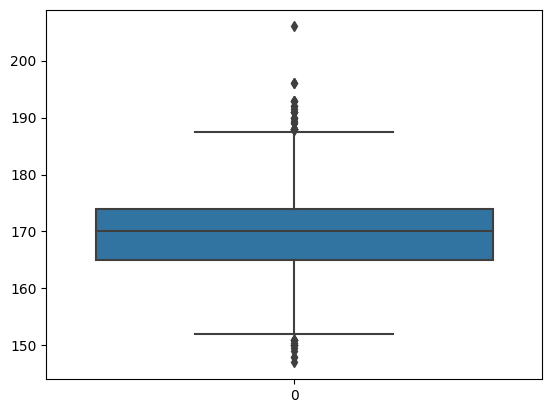

In [30]:
sns.boxplot(cw['HEIGHT_cm'])

print(np.where(cw['HEIGHT_cm']>10))

In [31]:
cw.loc[cw['HEIGHT_cm'] == 147]

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Intervention_Urgency
2222,57,30,147.0,61.91,85,105,137.0,82,0,0.0,NaN,4.56,Medium


In [32]:
cw.describe()

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres
count,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3144.000000,3155.000000,3155.000000,3155.000000,163.000000,3155.000000
mean,60.853249,28.506181,169.754295,76.246247,87.598098,88.384152,126.732506,79.698257,3.424723,0.051664,26.196319,3.695870
std,8.108238,4.576990,7.069723,13.030386,11.535454,10.737167,18.888221,60.274943,3.722920,0.221383,14.157343,1.831993
min,41.000000,18.000000,147.000000,48.290000,58.000000,54.000000,81.000000,1.000000,0.000000,0.000000,2.000000,-0.590000
25%,55.000000,25.000000,165.000000,67.320000,79.000000,81.000000,113.000000,44.000000,0.000000,0.000000,14.000000,2.355000
50%,61.000000,28.000000,170.000000,74.090000,86.000000,88.000000,125.000000,67.000000,3.000000,0.000000,24.000000,3.510000
75%,67.000000,31.000000,174.000000,83.000000,94.000000,95.000000,139.000000,94.000000,5.000000,0.000000,38.000000,4.860000
max,80.000000,63.000000,206.000000,163.350000,145.000000,132.000000,191.000000,715.000000,40.000000,1.000000,50.000000,12.770000


In [33]:
cw[cw['Visceral_Fat_Volume_Litres']<0]

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Intervention_Urgency
0,53,30,170.8,79.66,92,105,143.0,78,3,0.0,NaN,-0.59,None
1,64,23,169.0,58.28,67,77,95.0,117,3,0.0,NaN,-0.59,None


In [34]:
# dropped visceral fat as it cannot be less than 0 and we are trying to predict so don't want to replace or change the data
#cw.drop(cw[cw['Visceral_Fat_Volume_Litres'] < 0].index, inplace=True)
cw.loc[(cw['Visceral_Fat_Volume_Litres']< 0), 'Visceral_Fat_Volume_Litres'] = abs(cw['Visceral_Fat_Volume_Litres']) 
np.where(cw['Visceral_Fat_Volume_Litres']<=2.00
        ,"None",np.where(cw['Visceral_Fat_Volume_Litres']<=5.00,'Medium','High'))


array(['None', 'None', 'None', ..., 'High', 'High', 'High'], dtype='<U6')

In [35]:
cw.describe()

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres
count,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3144.000000,3155.000000,3155.000000,3155.000000,163.000000,3155.000000
mean,60.853249,28.506181,169.754295,76.246247,87.598098,88.384152,126.732506,79.698257,3.424723,0.051664,26.196319,3.696618
std,8.108238,4.576990,7.069723,13.030386,11.535454,10.737167,18.888221,60.274943,3.722920,0.221383,14.157343,1.830483
min,41.000000,18.000000,147.000000,48.290000,58.000000,54.000000,81.000000,1.000000,0.000000,0.000000,2.000000,0.000000
25%,55.000000,25.000000,165.000000,67.320000,79.000000,81.000000,113.000000,44.000000,0.000000,0.000000,14.000000,2.355000
50%,61.000000,28.000000,170.000000,74.090000,86.000000,88.000000,125.000000,67.000000,3.000000,0.000000,24.000000,3.510000
75%,67.000000,31.000000,174.000000,83.000000,94.000000,95.000000,139.000000,94.000000,5.000000,0.000000,38.000000,4.860000
max,80.000000,63.000000,206.000000,163.350000,145.000000,132.000000,191.000000,715.000000,40.000000,1.000000,50.000000,12.770000


In [36]:
cw.head()

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Intervention_Urgency
0,53,30,170.8,79.66,92,105,143.0,78,3,0.0,NaN,0.59,None
1,64,23,169.0,58.28,67,77,95.0,117,3,0.0,NaN,0.59,None
2,46,21,173.0,57.16,73,81,103.0,41,3,0.0,NaN,0.37,None
3,45,26,158.0,56.84,73,74,100.0,116,3,1.0,45.0,0.27,None
4,61,40,168.0,104.08,96,89,115.0,63,8,0.0,NaN,0.27,None


In [37]:
cw.shape

(3155, 13)

In [38]:
cw.describe()

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres
count,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3144.000000,3155.000000,3155.000000,3155.000000,163.000000,3155.000000
mean,60.853249,28.506181,169.754295,76.246247,87.598098,88.384152,126.732506,79.698257,3.424723,0.051664,26.196319,3.696618
std,8.108238,4.576990,7.069723,13.030386,11.535454,10.737167,18.888221,60.274943,3.722920,0.221383,14.157343,1.830483
min,41.000000,18.000000,147.000000,48.290000,58.000000,54.000000,81.000000,1.000000,0.000000,0.000000,2.000000,0.000000
25%,55.000000,25.000000,165.000000,67.320000,79.000000,81.000000,113.000000,44.000000,0.000000,0.000000,14.000000,2.355000
50%,61.000000,28.000000,170.000000,74.090000,86.000000,88.000000,125.000000,67.000000,3.000000,0.000000,24.000000,3.510000
75%,67.000000,31.000000,174.000000,83.000000,94.000000,95.000000,139.000000,94.000000,5.000000,0.000000,38.000000,4.860000
max,80.000000,63.000000,206.000000,163.350000,145.000000,132.000000,191.000000,715.000000,40.000000,1.000000,50.000000,12.770000


In [39]:
cw[cw['COMPUTER_USE_TIME_PER_DAY_HOURS'] > 24]


,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Intervention_Urgency
373,49,23,170.0,62.58,76,69,104.0,110,25,0.0,NaN,1.62,None
912,49,27,171.0,71.24,97,73,104.0,148,25,0.0,NaN,2.57,Medium
1033,52,31,165.0,78.03,85,100,121.0,89,25,1.0,35.0,2.74,Medium
1432,54,25,163.0,62.46,84,95,113.0,76,25,0.0,NaN,3.29,Medium
2245,69,29,171.0,77.24,99,98,126.0,56,28,0.0,NaN,4.61,Medium
2693,56,31,166.0,82.74,94,97,127.0,64,40,0.0,NaN,5.58,High
2722,59,45,170.0,120.48,111,123,165.0,58,40,0.0,NaN,5.66,High
3009,51,35,168.0,89.91,103,89,127.0,68,31,0.0,NaN,7.09,High


In [40]:
8/3155*100

0.25356576862123614

In [41]:
# dropped computer use time which have values more than 24
cw.drop(cw[cw['COMPUTER_USE_TIME_PER_DAY_HOURS'] > 24].index, inplace=True)

In [42]:
cw[cw['COMPUTER_USE_TIME_PER_DAY_HOURS'] > 24]

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Intervention_Urgency


In [43]:
cw.describe()

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres
count,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3136.000000,3147.000000,3147.000000,3147.000000,162.000000,3147.000000
mean,60.868446,28.500477,169.758754,76.235218,87.582777,88.372418,126.741071,79.688275,3.357483,0.051478,26.141975,3.695478
std,8.106835,4.569891,7.076715,13.015331,11.533599,10.718877,18.889351,60.332832,3.466250,0.221005,14.184178,1.830517
min,41.000000,18.000000,147.000000,48.290000,58.000000,54.000000,81.000000,1.000000,0.000000,0.000000,2.000000,0.000000
25%,55.000000,25.000000,165.000000,67.320000,79.000000,81.000000,113.000000,44.000000,0.000000,0.000000,14.000000,2.350000
50%,61.000000,28.000000,170.000000,74.070000,86.000000,88.000000,125.000000,67.000000,3.000000,0.000000,23.500000,3.510000
75%,67.000000,31.000000,174.000000,83.000000,94.000000,95.000000,139.000000,94.000000,5.000000,0.000000,38.000000,4.860000
max,80.000000,63.000000,206.000000,163.350000,145.000000,132.000000,191.000000,715.000000,24.000000,1.000000,50.000000,12.770000


In [44]:
cw.dtypes

AGE_years                            int64
BMI                                  int64
HEIGHT_cm                          float64
WEIGHT_kg                          float64
WAIST_CIRCUMFERENCE_cm               int64
DIASTOLIC_BLOOD_PRESSURE_mmHg        int64
SYSTOLIC_BLOOD_PRESSURE_mmHg       float64
WALK_DURATION_PER_DAY_MINUTES        int64
COMPUTER_USE_TIME_PER_DAY_HOURS      int64
SMOKING_STATUS                     float64
CIGARETTES_CONSUMED_PER_DAY        float64
Visceral_Fat_Volume_Litres         float64
Intervention_Urgency                object
dtype: object

In [45]:
cw.isna().sum()/len(cw)*100

AGE_years                           0.000000
BMI                                 0.000000
HEIGHT_cm                           0.000000
WEIGHT_kg                           0.000000
WAIST_CIRCUMFERENCE_cm              0.000000
DIASTOLIC_BLOOD_PRESSURE_mmHg       0.000000
SYSTOLIC_BLOOD_PRESSURE_mmHg        0.349539
WALK_DURATION_PER_DAY_MINUTES       0.000000
COMPUTER_USE_TIME_PER_DAY_HOURS     0.000000
SMOKING_STATUS                      0.000000
CIGARETTES_CONSUMED_PER_DAY        94.852240
Visceral_Fat_Volume_Litres          0.000000
Intervention_Urgency                0.000000
dtype: float64

In [46]:
# Dropped the records where the systolic blood pressure is null as the percentage of the data is less than 1%
# also we can impute this with any other value but to impute we need to get to know this from a doctor 

cw.dropna(subset=['SYSTOLIC_BLOOD_PRESSURE_mmHg'],axis=0,inplace=True)

In [47]:
cw.shape

(3136, 13)

In [48]:
cw.isna().sum()/len(cw)*100

AGE_years                           0.000000
BMI                                 0.000000
HEIGHT_cm                           0.000000
WEIGHT_kg                           0.000000
WAIST_CIRCUMFERENCE_cm              0.000000
DIASTOLIC_BLOOD_PRESSURE_mmHg       0.000000
SYSTOLIC_BLOOD_PRESSURE_mmHg        0.000000
WALK_DURATION_PER_DAY_MINUTES       0.000000
COMPUTER_USE_TIME_PER_DAY_HOURS     0.000000
SMOKING_STATUS                      0.000000
CIGARETTES_CONSUMED_PER_DAY        94.866071
Visceral_Fat_Volume_Litres          0.000000
Intervention_Urgency                0.000000
dtype: float64

In [49]:
# Replaced null values with 0 in column cigarettes consumed per day
cw['CIGARETTES_CONSUMED_PER_DAY'] = cw['CIGARETTES_CONSUMED_PER_DAY'].fillna(0)

In [50]:
cw.isna().sum()/len(cw)*100

AGE_years                          0.0
BMI                                0.0
HEIGHT_cm                          0.0
WEIGHT_kg                          0.0
WAIST_CIRCUMFERENCE_cm             0.0
DIASTOLIC_BLOOD_PRESSURE_mmHg      0.0
SYSTOLIC_BLOOD_PRESSURE_mmHg       0.0
WALK_DURATION_PER_DAY_MINUTES      0.0
COMPUTER_USE_TIME_PER_DAY_HOURS    0.0
SMOKING_STATUS                     0.0
CIGARETTES_CONSUMED_PER_DAY        0.0
Visceral_Fat_Volume_Litres         0.0
Intervention_Urgency               0.0
dtype: float64

In [51]:
cw[cw['SMOKING_STATUS '] == 0]

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Intervention_Urgency
0,53,30,170.8,79.66,92,105,143.0,78,3,0.0,0.0,0.59,None
1,64,23,169.0,58.28,67,77,95.0,117,3,0.0,0.0,0.59,None
2,46,21,173.0,57.16,73,81,103.0,41,3,0.0,0.0,0.37,None
4,61,40,168.0,104.08,96,89,115.0,63,8,0.0,0.0,0.27,None
5,66,36,173.0,100.40,92,69,89.0,163,3,0.0,0.0,0.27,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,76,34,168.0,89.59,106,90,176.0,23,6,0.0,0.0,10.47,High
3151,79,30,176.0,89.02,109,94,122.0,72,3,0.0,0.0,10.49,High
3152,46,35,172.0,99.14,112,96,139.0,24,3,0.0,0.0,10.69,High
3153,63,43,166.0,112.64,135,101,129.0,55,12,0.0,0.0,11.62,High


In [52]:
cw.head()

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Intervention_Urgency
0,53,30,170.8,79.66,92,105,143.0,78,3,0.0,0.0,0.59,None
1,64,23,169.0,58.28,67,77,95.0,117,3,0.0,0.0,0.59,None
2,46,21,173.0,57.16,73,81,103.0,41,3,0.0,0.0,0.37,None
3,45,26,158.0,56.84,73,74,100.0,116,3,1.0,45.0,0.27,None
4,61,40,168.0,104.08,96,89,115.0,63,8,0.0,0.0,0.27,None


In [53]:
cw[cw['WALK_DURATION_PER_DAY_MINUTES'] == 1]

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Intervention_Urgency
437,66,25,173.0,65.65,85,83,115.0,1,0,0.0,0.0,1.78,None
1165,64,29,172.0,81.65,99,74,121.0,1,3,0.0,0.0,2.91,Medium
2476,48,38,166.0,99.40,93,80,114.0,1,9,0.0,0.0,5.07,High


In [54]:
cw.isna().sum()/len(cw)*100

AGE_years                          0.0
BMI                                0.0
HEIGHT_cm                          0.0
WEIGHT_kg                          0.0
WAIST_CIRCUMFERENCE_cm             0.0
DIASTOLIC_BLOOD_PRESSURE_mmHg      0.0
SYSTOLIC_BLOOD_PRESSURE_mmHg       0.0
WALK_DURATION_PER_DAY_MINUTES      0.0
COMPUTER_USE_TIME_PER_DAY_HOURS    0.0
SMOKING_STATUS                     0.0
CIGARETTES_CONSUMED_PER_DAY        0.0
Visceral_Fat_Volume_Litres         0.0
Intervention_Urgency               0.0
dtype: float64

In [55]:
cw.shape

(3136, 13)

In [56]:
3156-3134

22

In [57]:
22/3156*100

0.697084917617237

In [58]:
cw['Intervention_Urgency'].value_counts()

Medium    1884
High       699
None       553
Name: Intervention_Urgency, dtype: int64

In [59]:
cw.dtypes

AGE_years                            int64
BMI                                  int64
HEIGHT_cm                          float64
WEIGHT_kg                          float64
WAIST_CIRCUMFERENCE_cm               int64
DIASTOLIC_BLOOD_PRESSURE_mmHg        int64
SYSTOLIC_BLOOD_PRESSURE_mmHg       float64
WALK_DURATION_PER_DAY_MINUTES        int64
COMPUTER_USE_TIME_PER_DAY_HOURS      int64
SMOKING_STATUS                     float64
CIGARETTES_CONSUMED_PER_DAY        float64
Visceral_Fat_Volume_Litres         float64
Intervention_Urgency                object
dtype: object

In [60]:
cw.head()

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Intervention_Urgency
0,53,30,170.8,79.66,92,105,143.0,78,3,0.0,0.0,0.59,None
1,64,23,169.0,58.28,67,77,95.0,117,3,0.0,0.0,0.59,None
2,46,21,173.0,57.16,73,81,103.0,41,3,0.0,0.0,0.37,None
3,45,26,158.0,56.84,73,74,100.0,116,3,1.0,45.0,0.27,None
4,61,40,168.0,104.08,96,89,115.0,63,8,0.0,0.0,0.27,None


In [61]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

from sklearn.neighbors import KNeighborsClassifier

In [62]:
X = cw[['AGE_years','BMI ','HEIGHT_cm','WEIGHT_kg','CIGARETTES_CONSUMED_PER_DAY','COMPUTER_USE_TIME_PER_DAY_HOURS','DIASTOLIC_BLOOD_PRESSURE_mmHg','SYSTOLIC_BLOOD_PRESSURE_mmHg','WAIST_CIRCUMFERENCE_cm','WALK_DURATION_PER_DAY_MINUTES']]

y = cw.Intervention_Urgency # Target variable

In [63]:
# Normalize the data

from sklearn.preprocessing import MinMaxScaler

dataset = X
scaler = MinMaxScaler(feature_range=(0, 1))

# Scaling 
norm_X = scaler.fit_transform(dataset) 
print(norm_X)

[[0.30769231 0.26666667 0.40338983 ... 0.56363636 0.3908046  0.10784314]
 [0.58974359 0.11111111 0.37288136 ... 0.12727273 0.10344828 0.16246499]
 [0.12820513 0.06666667 0.44067797 ... 0.2        0.17241379 0.05602241]
 ...
 [0.12820513 0.37777778 0.42372881 ... 0.52727273 0.62068966 0.03221289]
 [0.56410256 0.55555556 0.3220339  ... 0.43636364 0.88505747 0.07563025]
 [0.76923077 0.37777778 0.62711864 ... 0.65454545 0.63218391 0.5210084 ]]


In [64]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(norm_X, y, test_size=0.3, random_state=52, stratify=y) # 70% training and 30% test
print(X_train.shape);
print(X_test.shape)

(2195, 10)
(941, 10)


In [65]:
# Create Decision Tree Classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


#Predict the response for test dataset
y_predict_DT = clf.predict(X_test)


In [66]:
#Create ANN Classifier Object
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8,8), activation='relu', solver='adam',  max_iter=400)

# Train ANN Classifer
mlp = mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
y_predict_ann = mlp.predict(X_test)

In [67]:
# Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors = 7)

# Train KNN Classifier
knn = knn.fit(X_train,y_train)

y_predict_knn = knn.predict(X_test)

In [68]:
# Create Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

# Train Naive Bayes Classifier
nb = nb.fit(X_train,y_train)

y_predict_NB = nb.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score
nb_score = accuracy_score(y_test, y_predict_NB)
dt_score = accuracy_score(y_test, y_predict_DT)
ann_score = accuracy_score(y_test, y_predict_ann)
knn_score = accuracy_score(y_test, y_predict_knn)

print("Accuracy score (NB): ", nb_score)
print("Accuracy score (DT): ", dt_score)
print("Accuracy score (ANN): ", ann_score)
print("Accuracy score (KNN): ", knn_score)

Accuracy score (NB):  0.5812964930924548
Accuracy score (DT):  0.5281615302869288
Accuracy score (ANN):  0.6556854410201913
Accuracy score (KNN):  0.589798087141339


In [70]:
from sklearn.metrics import confusion_matrix,classification_report
nb_matrix = confusion_matrix(y_test, y_predict_NB)
nb_matrix

array([[109,  94,   7],
       [ 72, 331, 162],
       [  5,  54, 107]])

In [71]:
dt_matrix = confusion_matrix(y_test, y_predict_DT)
dt_matrix

array([[ 98, 102,  10],
       [102, 341, 122],
       [ 16,  92,  58]])

In [72]:
ann_matrix = confusion_matrix(y_test, y_predict_ann)
ann_matrix

array([[ 82, 127,   1],
       [ 39, 509,  17],
       [  2, 138,  26]])

In [73]:
knn_matrix = confusion_matrix(y_test, y_predict_knn)
knn_matrix

array([[ 76, 131,   3],
       [ 68, 453,  44],
       [  7, 133,  26]])

Text(0.5, 427.9555555555555, 'Predicted label')

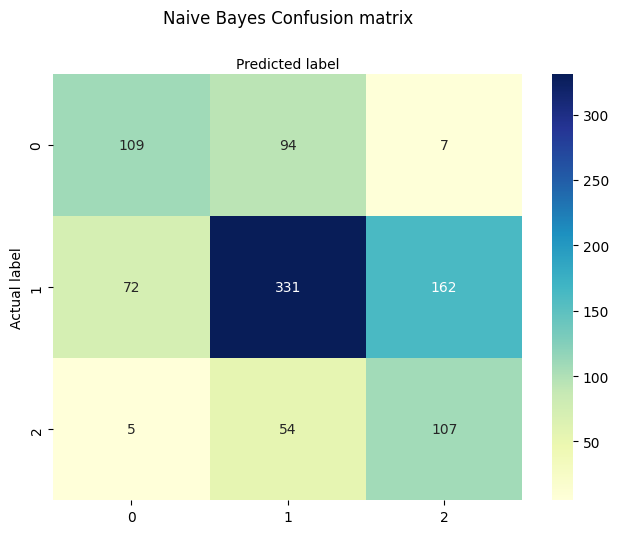

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix of Naive Bayes

%matplotlib inline
class_names=["None","Medium","High"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(nb_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Naive Bayes Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

Text(0.5, 427.9555555555555, 'Predicted label')

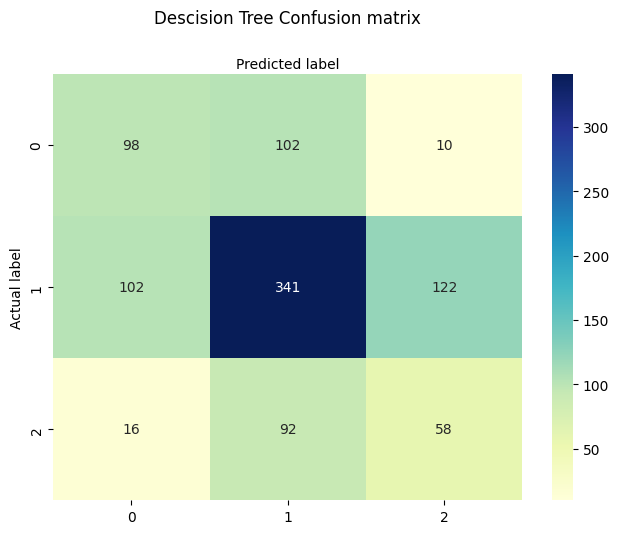

In [75]:
# Confusion Matrix of Decision Tree

%matplotlib inline
class_names=["None","Medium","High"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(dt_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Descision Tree Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

Text(0.5, 427.9555555555555, 'Predicted label')

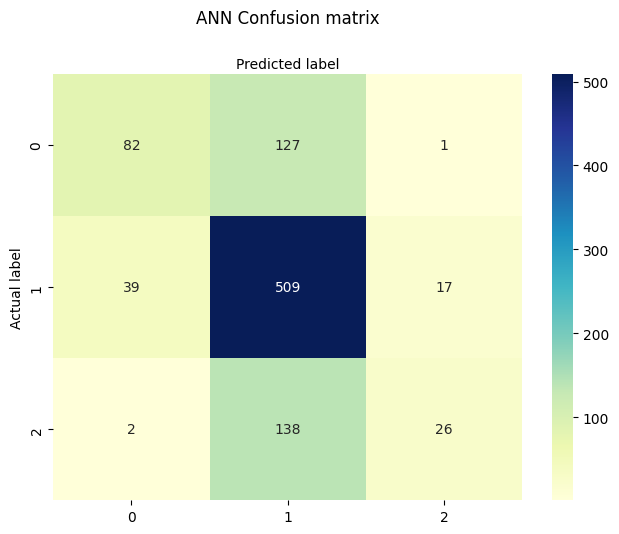

In [76]:
# Confusion Matrix of ANN

%matplotlib inline
class_names=["None","Medium","High"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(ann_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('ANN Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

Text(0.5, 427.9555555555555, 'Predicted label')

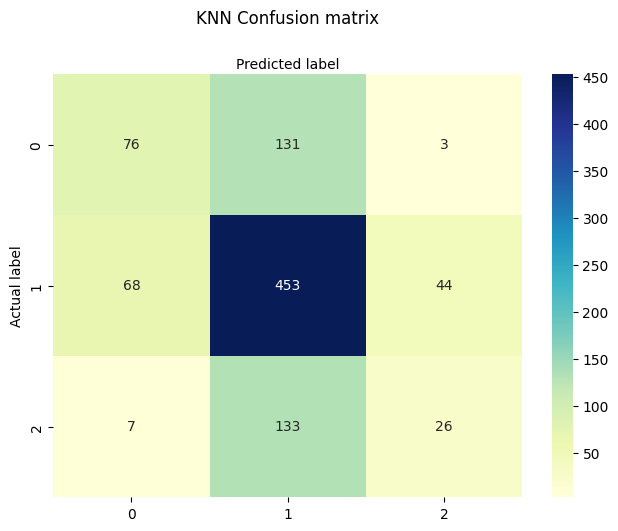

In [77]:
# COnfusion Matrix of KNN

%matplotlib inline
class_names=["None","Medium","High"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(knn_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('KNN Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

In [78]:

print("Performance Metrics:")
print("Naive Bayes")
print(classification_report(y_test, y_predict_NB))


Performance Metrics:
Naive Bayes
              precision    recall  f1-score   support

        High       0.59      0.52      0.55       210
      Medium       0.69      0.59      0.63       565
        None       0.39      0.64      0.48       166

    accuracy                           0.58       941
   macro avg       0.55      0.58      0.56       941
weighted avg       0.61      0.58      0.59       941



In [79]:

print("Decision Tree")
print(classification_report(y_test, y_predict_DT))


Decision Tree
              precision    recall  f1-score   support

        High       0.45      0.47      0.46       210
      Medium       0.64      0.60      0.62       565
        None       0.31      0.35      0.33       166

    accuracy                           0.53       941
   macro avg       0.47      0.47      0.47       941
weighted avg       0.54      0.53      0.53       941



In [80]:

print("ANN")
print(classification_report(y_test, y_predict_ann))


ANN
              precision    recall  f1-score   support

        High       0.67      0.39      0.49       210
      Medium       0.66      0.90      0.76       565
        None       0.59      0.16      0.25       166

    accuracy                           0.66       941
   macro avg       0.64      0.48      0.50       941
weighted avg       0.65      0.66      0.61       941



In [81]:

print("KNN")
print(classification_report(y_test, y_predict_knn))

print("Precision:",metrics.precision_score(y_test, y_predict_knn, average = 'macro'))
print("Recall:",metrics.recall_score(y_test, y_predict_knn, average = 'macro'))
print("F1 Score:",metrics.f1_score(y_test, y_predict_knn, average = 'macro'))

KNN
              precision    recall  f1-score   support

        High       0.50      0.36      0.42       210
      Medium       0.63      0.80      0.71       565
        None       0.36      0.16      0.22       166

    accuracy                           0.59       941
   macro avg       0.50      0.44      0.45       941
weighted avg       0.55      0.59      0.56       941

Precision: 0.49709160167323524
Recall: 0.44010039314442767
F1 Score: 0.44844470722233426


In [97]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
y_true = label_binarize(y_test, classes=['None', 'Medium', 'High'])
y_predict_NB = label_binarize(y_predict_NB, classes=['None', 'Medium', 'High'])

# calculate AUC-ROC scores for each class
auc_roc_scores = []
for i in range(y_true.shape[1]):
    score = roc_auc_score(y_true[:, i], y_predict_NB[:, i])
    auc_roc_scores.append(score)

# average the AUC-ROC scores for all the classes
avg_auc_roc_score = sum(auc_roc_scores) / len(auc_roc_scores)
print(avg_auc_roc_score)

0.5836576791256638


In [101]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
y_true = label_binarize(y_test, classes=['None', 'Medium', 'High'])
y_predict_DT = label_binarize(y_predict_DT, classes=['None', 'Medium', 'High'])

# calculate AUC-ROC scores for each class
auc_roc_scores = []
for i in range(y_true.shape[1]):
    score = roc_auc_score(y_true[:, i], y_predict_DT[:, i])
    auc_roc_scores.append(score)

# average the AUC-ROC scores for all the classes
avg_auc_roc_score = sum(auc_roc_scores) / len(auc_roc_scores)
print(avg_auc_roc_score)

0.45454740329387827


In [102]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
y_true = label_binarize(y_test, classes=['None', 'Medium', 'High'])
y_predict_ann = label_binarize(y_predict_ann, classes=['None', 'Medium', 'High'])

# calculate AUC-ROC scores for each class
auc_roc_scores = []
for i in range(y_true.shape[1]):
    score = roc_auc_score(y_true[:, i], y_predict_ann[:, i])
    auc_roc_scores.append(score)

# average the AUC-ROC scores for all the classes
avg_auc_roc_score = sum(auc_roc_scores) / len(auc_roc_scores)
print(avg_auc_roc_score)

0.4996592095954699


In [100]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
y_true = label_binarize(y_test, classes=['None', 'Medium', 'High'])
y_predict_knn = label_binarize(y_predict_knn, classes=['None', 'Medium', 'High'])

# calculate AUC-ROC scores for each class
auc_roc_scores = []
for i in range(y_true.shape[1]):
    score = roc_auc_score(y_true[:, i], y_predict_knn[:, i])
    auc_roc_scores.append(score)

# average the AUC-ROC scores for all the classes
avg_auc_roc_score = sum(auc_roc_scores) / len(auc_roc_scores)
print(avg_auc_roc_score)

0.5758215298936543


In [83]:
#Optimization of Naive Bayes

param_grid_nb = { 'var_smoothing': np.logspace(0,-9, num = 100)}

In [84]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

recall = make_scorer(recall_score, average='macro')
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1, scoring=recall)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.012328467394420659)


In [85]:
y_pred = nbModel_grid.predict(X_test)


Text(0.5, 427.9555555555555, 'Predicted label')

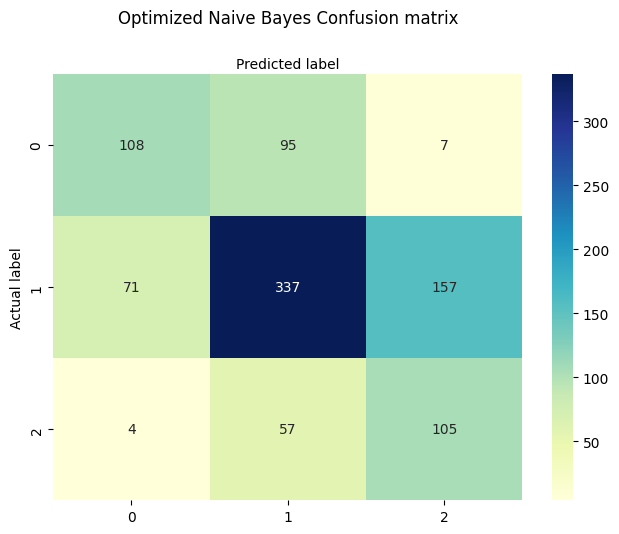

In [103]:
from sklearn.metrics import confusion_matrix
Opt_NB = confusion_matrix(y_test, y_pred)


%matplotlib inline
class_names=["None","Medium","High"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(Opt_NB), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Optimized Naive Bayes Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

In [110]:
from sklearn.metrics import accuracy_score
nb_opt_score = accuracy_score(y_test, y_pred)
print("Accuracy score (NB Optimized): ", nb_opt_score)

Accuracy score (NB Optimized):  0.5844845908607864


In [108]:

print("Performance Metrics:\n")
print(classification_report(y_test, y_pred))

Performance Metrics:

              precision    recall  f1-score   support

        High       0.59      0.51      0.55       210
      Medium       0.69      0.60      0.64       565
        None       0.39      0.63      0.48       166

    accuracy                           0.58       941
   macro avg       0.56      0.58      0.56       941
weighted avg       0.61      0.58      0.59       941

